In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
resumes = pd.read_csv('dataset/ResumeDataSet.csv')
resumes.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
resumes.shape

(962, 2)

In [4]:
resumes['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

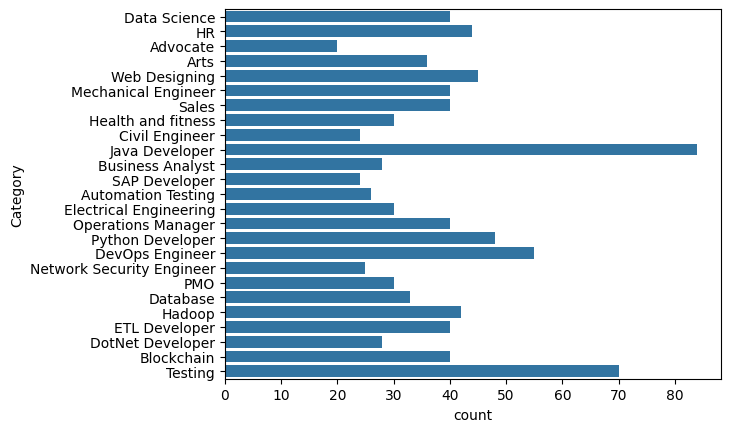

In [5]:
sns.countplot(resumes['Category'])
plt.show()

In [6]:
resumes['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

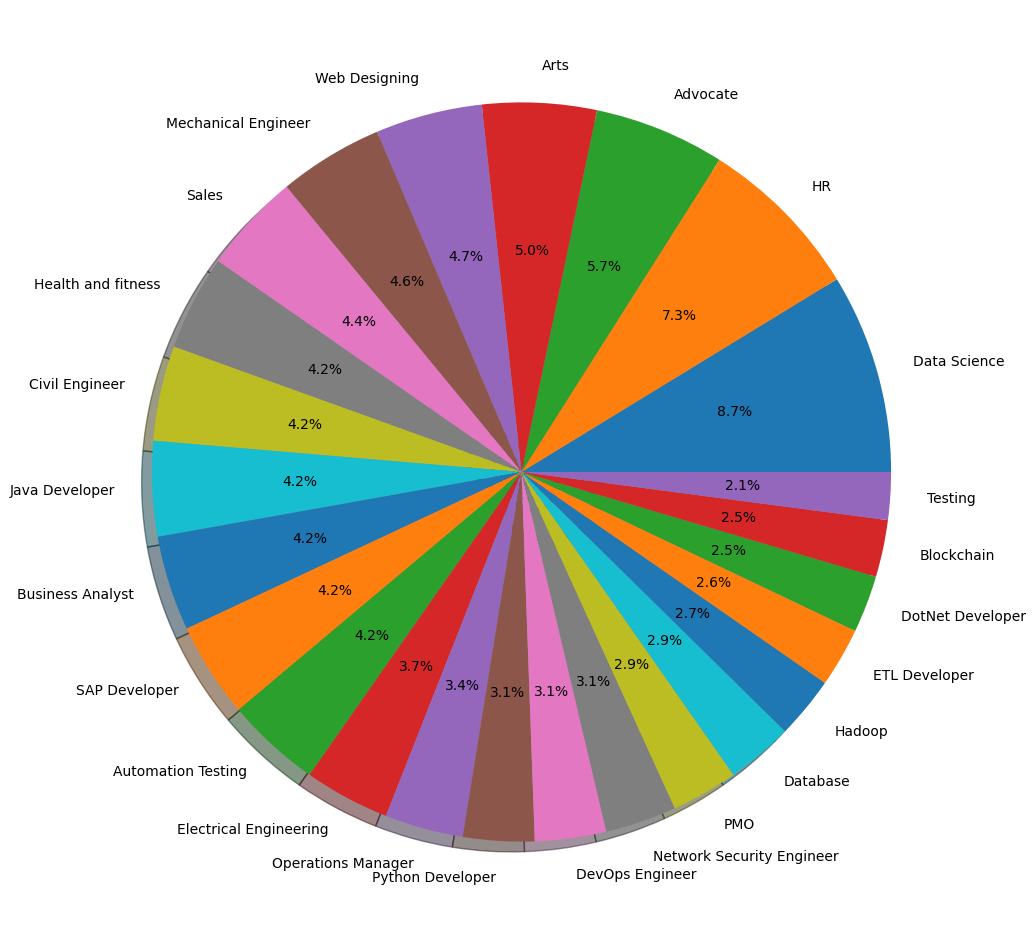

In [7]:
counts = resumes['Category'].value_counts()
labels = resumes['Category'].unique()

plt.figure(figsize=(12, 12))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

In [8]:
resumes['Category'][900]

'Testing'

In [9]:
resumes['Resume'][900]

"COMPUTER PROFICIENCY â\x80¢ Basic: MS-Office (PowerPoint, word, Outlook, Excel) â\x80¢ Language Known: Basics of C, CPP, Java. â\x80¢ Basics of Networking â\x80¢ Basics command of Linux PROJECT DETAILS Minor Project Details: â\x80¢ Title: Applocker for Android. â\x80¢ Project Area: Android Application. â\x80¢ Description: Applocker provides the protection of the System applications as well as the Third party applications installed in the Android devices. The password protection is provided with the help of patterns of volume keys. Hence, an extra measure of privacy is acquired. Major Project Details: â\x80¢ Title: Online Complaint System For Cyber Crimes. â\x80¢ Project Area: Android Application â\x80¢ Description: Online Complaint System for Cyber Crimes is an android application which will be in use after a person lodged a complaint in Police station regarding cyber crime but no action has been taken against it within the prescribed time constraint. Such person will directly use thi

## Cleaning Textual Data

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yusuf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [29]:
import re
def cleanResume(text):
    cleanTxt = re.sub('https://\S+', ' ', text)
    cleanTxt = re.sub('www.\S+', ' ', cleanTxt)
    cleanTxt = re.sub('@\S+', ' ', cleanTxt)
    cleanTxt = re.sub('#\S+', ' ', cleanTxt)
    cleanTxt = re.sub('[%s]' % re.escape("""!@#$%^&*()~`{}[]:;"'<,>.?/|\-="""), ' ', cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]', ' ', cleanTxt)
    cleanTxt = re.sub('\s+', ' ', cleanTxt)
    cleanTxt = [w for w in cleanTxt.split() if not w.lower() in stop_words]
    cleanTxt = ' '.join(cleanTxt)
    return cleanTxt

In [30]:
test_txt = "This is my website link: https://www.yusufansari.tech/"
cleanResume(test_txt)

'website link'

In [31]:
test_txt = "This is my at tag used: @gmail.com"
cleanResume(test_txt)

'tag used'

In [32]:
test_txt = "This is my hash tag used: #sleep"
cleanResume(test_txt)

'hash tag used'

In [33]:
test_txt = "This is [good bro!].:) \nI like it alot \t too much!!"
cleanResume(test_txt)

'good bro like alot much'

In [34]:
resumes['Resume'] = resumes['Resume'].apply(lambda x: cleanResume(x))

In [35]:
resumes['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run a

## Classes Encoding (Converting Classes to Numerical Representation)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
le.fit(resumes['Category'])
resumes['Category'] = le.transform(resumes['Category'])

In [38]:
classes_encoding = dict(zip(range(len(le.classes_)), le.classes_))
classes_encoding

{0: 'Advocate',
 1: 'Arts',
 2: 'Automation Testing',
 3: 'Blockchain',
 4: 'Business Analyst',
 5: 'Civil Engineer',
 6: 'Data Science',
 7: 'Database',
 8: 'DevOps Engineer',
 9: 'DotNet Developer',
 10: 'ETL Developer',
 11: 'Electrical Engineering',
 12: 'HR',
 13: 'Hadoop',
 14: 'Health and fitness',
 15: 'Java Developer',
 16: 'Mechanical Engineer',
 17: 'Network Security Engineer',
 18: 'Operations Manager',
 19: 'PMO',
 20: 'Python Developer',
 21: 'SAP Developer',
 22: 'Sales',
 23: 'Testing',
 24: 'Web Designing'}

In [39]:
resumes.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 May 2017 B E UIT RG...
2,6,Areas Interest Deep Learning Control System De...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


## Vectorization (Converting Text to Numerical Representation)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(resumes['Resume'])
requiredText = tfidf.transform(resumes['Resume'])

In [41]:
requiredText

<962x7318 sparse matrix of type '<class 'numpy.float64'>'
	with 163872 stored elements in Compressed Sparse Row format>

## Training | Testing | Accuracy

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, resumes['Category'], test_size=0.2, random_state=42)

In [43]:
X_train.shape

(769, 7318)

In [44]:
X_test.shape

(193, 7318)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9844559585492227


## Model Saving

In [47]:
import pickle

pickle.dump(tfidf, open('pickles/vectorizer.pkl', 'wb'))
pickle.dump(clf, open('pickles/classifier.pkl', 'wb'))

## Testing

In [48]:
resume = """
Contact Kenrick Fernandes
www.linkedin.com/in/kenrickfernandes (LinkedIn)
Top Skills Neural Networks Web Development
Python (Programming Language) Certifications
Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning Microsoft Certified: Azure Fundamentals
Sequences, Time Series and Prediction
Honors-Awards
#Inspire - Recognition for "Vision, Desire and a Whatever it takes attitude"
Recognition for contributions towards revolutionary Computer Vision Project.
Think Tank
Senior Machine Learning Engineer at Quantiphi Mumbai, Maharashtra, India Experience Quantiphi
3 years 8 months
Senior Machine Learning Engineer April 2022 - Present (2 years) Mumbai, Maharashtra, India
• Lead a team of Machine Learning Engineers to develop an in-house Deep Learning pipeline consisting of Object Detection, Classification and Tracking. This pipeline was developed and deployed for the Edge, using NVIDIA's Jetson Xavier NX and Azure IOTEdge.
• Researched and implemented SOTA models and techniques for the project. Identified pain-points within the operational processes and ideated solutions to tackle them. Realized an accuracy gain of 45%+ and lowered the time complexity by half.
• Lead the communication with US based clients on several threads for the project. (Data analysis and quality, Camera analysis, Dry Runs to explain technical details with clients, Leadership connects etc)
• Have relevant experience in Cloud Computing (compute, data, ml services) and certified in all 3 platforms- AWS, GCP, Azure. Obtained experience to deploy dockerized computer vision applications in IOT devices that run in realtime on image data.
• Lead the training and content creation for 5 Batches of Campus Freshers for the MLE post. Mentored several junior teammates who have showcased their skillsets productively. Interviewed nearly 60 candidates for the MLE post in the last year.
Machine Learning Engineer August 2020 - June 2022 (1 year 11 months) Mumbai, Maharashtra, India
Machine Learning Engineer with a mastery over Computer Vision and Traditional ML.
Page 1 of 2Gaining practical experience in cloud computing, with a focus in ML model development and deployment.
Education
Fr. Conceicao Rodrigues College of Engineering Bachelor of Engineering - BE, Computer Science · (2016 - 2020)
St. Xavier's College Hsc, Science · (2014 - 2016)
"""

In [50]:
import pickle

clf = pickle.load(open('pickles/classifier.pkl', 'rb'))

In [52]:
cleanedResume = cleanResume(resume)
cleanedResume

'Contact Kenrick Fernandes LinkedIn Top Skills Neural Networks Web Development Python Programming Language Certifications Introduction TensorFlow Artificial Intelligence Machine Learning Deep Learning Microsoft Certified Azure Fundamentals Sequences Time Series Prediction Honors Awards Recognition Vision Desire Whatever takes attitude Recognition contributions towards revolutionary Computer Vision Project Think Tank Senior Machine Learning Engineer Quantiphi Mumbai Maharashtra India Experience Quantiphi 3 years 8 months Senior Machine Learning Engineer April 2022 Present 2 years Mumbai Maharashtra India Lead team Machine Learning Engineers develop house Deep Learning pipeline consisting Object Detection Classification Tracking pipeline developed deployed Edge using NVIDIA Jetson Xavier NX Azure IOTEdge Researched implemented SOTA models techniques project Identified pain points within operational processes ideated solutions tackle Realized accuracy gain 45 + lowered time complexity hal

In [53]:
cleanedResume = tfidf.transform([cleanedResume])

In [54]:
prediction_id = clf.predict(cleanedResume)[0]

In [55]:
resume_category = classes_encoding.get(prediction_id, "Unknown")
print(f"Resume Category: {resume_category}")

Resume Category: Data Science
